In [3]:
from datasets import load_dataset

ds = load_dataset("ucirvine/sms_spam")

/Users/kennyho/Dev/k-code-experiments/text-fraud-detection/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 5574/5574 [00:00<00:00, 410641.46 examples/s]


In [4]:
for i in range(5):
    print(ds["train"][i])


{'sms': 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n', 'label': 0}
{'sms': 'Ok lar... Joking wif u oni...\n', 'label': 0}
{'sms': "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n", 'label': 1}
{'sms': 'U dun say so early hor... U c already then say...\n', 'label': 0}
{'sms': "Nah I don't think he goes to usf, he lives around here though\n", 'label': 0}


In [5]:
import pandas as pd
df = pd.DataFrame(ds['train'])

In [7]:
df['message_length'] = df['sms'].str.len()
print("Message length statistics:")
print(df.groupby('label')['message_length'].describe())

Message length statistics:
        count        mean        std   min    25%    50%    75%    max
label                                                                 
0      4827.0   72.471929  58.326643   3.0   34.0   53.0   94.0  911.0
1       747.0  139.676037  28.871250  14.0  134.0  150.0  158.0  224.0


In [8]:
# seems like spam is more lengthy...about 100 characters more than ham

In [9]:
# Word count analysis
df['word_count'] = df['sms'].str.split().str.len()

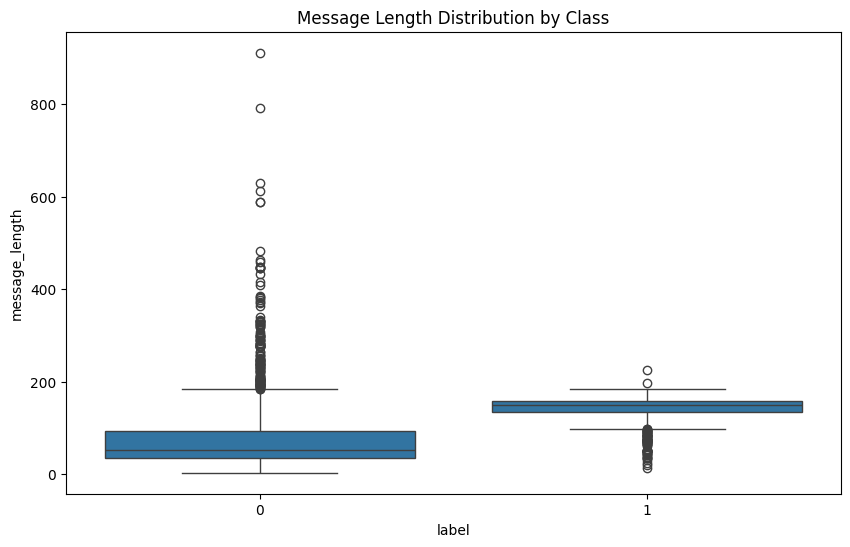

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of message lengths by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=df)
plt.title('Message Length Distribution by Class')
plt.show()


In [13]:
# outliars are ham messages with more than 100 words

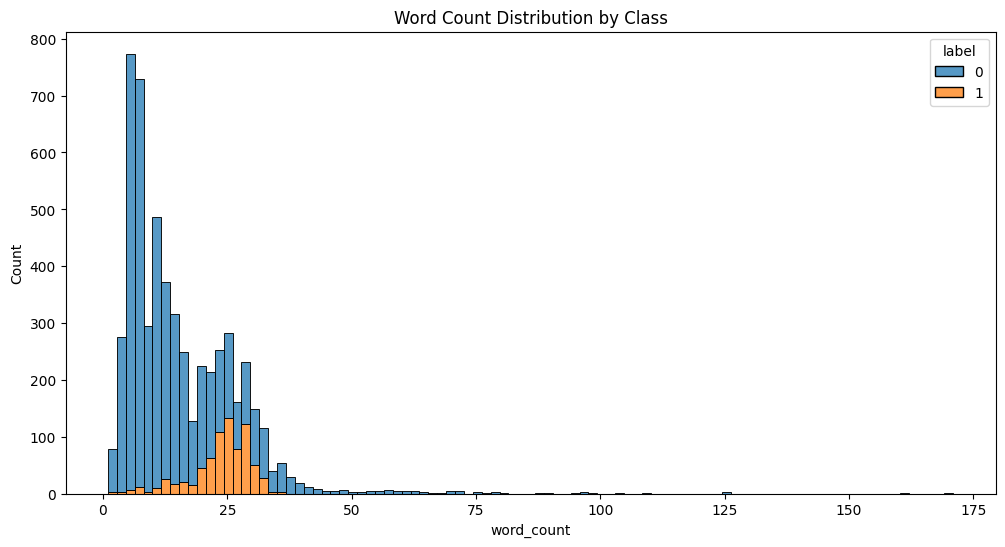

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='label', multiple="stack")
plt.title('Word Count Distribution by Class')
plt.show()

In [17]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download the stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Add any additional stop words you want to filter out
additional_stop_words = {'u', 'ur', 'im', 'ill', 'dont', 'cant', 'ive', 'thats', 'youre'}
stop_words.update(additional_stop_words)

def get_common_words(text_series, n=10):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\w+', words)
    # Filter out stop words
    meaningful_words = [word for word in words if word not in stop_words]
    return Counter(meaningful_words).most_common(n)

# Most common words in spam vs. non-spam
spam_words = get_common_words(df[df['label'] == 1]['sms'])
ham_words = get_common_words(df[df['label'] == 0]['sms'])

print("Most common meaningful words in spam messages:", spam_words)
print("\nMost common meaningful words in legitimate messages:", ham_words)

Most common meaningful words in spam messages: [('call', 355), ('free', 224), ('2', 207), ('txt', 163), ('4', 137), ('mobile', 127), ('text', 125), ('stop', 123), ('claim', 113), ('1', 111)]

Most common meaningful words in legitimate messages: [('2', 326), ('gt', 318), ('lt', 316), ('get', 305), ('ok', 288), ('go', 252), ('call', 238), ('know', 237), ('good', 235), ('like', 234)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kennyho/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# free and claim .. are common in spam 

In [19]:
texts_data = load_dataset("ucirvine/sms_spam")
X = 
# DatasetDict({
#     train: Dataset({
#         features: ['sms', 'label'],
#         num_rows: 5574
#     })
# })

In [20]:
def create_vocabulary(texts, max_words=10000):
    # Flatten all words and count them
    all_words = ' '.join(texts).lower().split()
    word_counts = Counter(all_words)
    # Get most common words
    vocab = ['<PAD>', '<UNK>'] + [word for word, _ in word_counts.most_common(max_words-2)]
    # Create word to index mapping
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    return word2idx



In [27]:
word2idx

{'<PAD>': 0,
 '<UNK>': 1,
 'to': 2,
 'i': 3,
 'you': 4,
 'a': 5,
 'the': 6,
 'u': 7,
 'and': 8,
 'is': 9,
 'in': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'of': 14,
 'me': 15,
 'have': 16,
 'call': 17,
 'on': 18,
 'are': 19,
 'that': 20,
 'it': 21,
 '2': 22,
 'so': 23,
 'but': 24,
 'or': 25,
 'not': 26,
 'at': 27,
 'ur': 28,
 'can': 29,
 'if': 30,
 'with': 31,
 'will': 32,
 "i'm": 33,
 'be': 34,
 'get': 35,
 'just': 36,
 'do': 37,
 'we': 38,
 'this': 39,
 'when': 40,
 'from': 41,
 '&lt;#&gt;': 42,
 'go': 43,
 'up': 44,
 'all': 45,
 'no': 46,
 '4': 47,
 'how': 48,
 'what': 49,
 'now': 50,
 '.': 51,
 'like': 52,
 'got': 53,
 'know': 54,
 'was': 55,
 'free': 56,
 'out': 57,
 'come': 58,
 'am': 59,
 'its': 60,
 'then': 61,
 'good': 62,
 'send': 63,
 '?': 64,
 'only': 65,
 'want': 66,
 'he': 67,
 'as': 68,
 'text': 69,
 'time': 70,
 "i'll": 71,
 'by': 72,
 'love': 73,
 '...': 74,
 'going': 75,
 'ok': 76,
 'ü': 77,
 'need': 78,
 'about': 79,
 'r': 80,
 'still': 81,
 'one': 82,
 'txt': 83,
 'n

In [28]:
vocab_size = len(word2idx)
print(vocab_size)

10000


In [31]:
from torch.utils.data import Dataset, DataLoader
class SMSDataset(Dataset):
    def __init__(self, texts, labels, word2idx, max_length=50):
        self.texts = texts
        self.labels = labels
        self.word2idx = word2idx
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts.iloc[idx].lower().split()
        # Convert words to indices
        indices = [self.word2idx.get(word, self.word2idx['<UNK>']) for word in text]
        # Pad or truncate to max_length
        if len(indices) < self.max_length:
            indices += [self.word2idx['<PAD>']] * (self.max_length - len(indices))
        else:
            indices = indices[:self.max_length]
            
        return {
            'text': torch.tensor(indices, dtype=torch.long),
            'label': torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        }

In [32]:
class SMSDataset(Dataset):
    def __init__(self, dataset):
        self.texts = dataset['sms']
        self.labels = dataset['label']
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        return text, label

In [33]:
full_dataset = SMSDataset(texts_data['train'])


In [34]:
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

In [38]:
from torch.utils.data import random_split, Dataset
import torch

# Create the splits
train_dataset, test_dataset = random_split(
    full_dataset, 
    [train_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 4459
Test set size: 1115


In [40]:
x_train, y_train = zip(*train_dataset)

In [45]:
y_train, y_test = zip(*test_dataset)

In [46]:
word2idx = create_vocabulary(x_train)

In [47]:
class SMSDataset(Dataset):
    def __init__(self, texts, labels, word2idx, max_length=50):
        self.texts = texts
        self.labels = labels
        self.word2idx = word2idx
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts.iloc[idx].lower().split()
        # Convert words to indices
        indices = [self.word2idx.get(word, self.word2idx['<UNK>']) for word in text]
        # Pad or truncate to max_length
        if len(indices) < self.max_length:
            indices += [self.word2idx['<PAD>']] * (self.max_length - len(indices))
        else:
            indices = indices[:self.max_length]
            
        return {
            'text': torch.tensor(indices, dtype=torch.long),
            'label': torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        }

In [48]:
train_dataset = SMSDataset(x_train, y_train, word2idx)
test_dataset = SMSDataset(y_train, y_test, word2idx)

In [49]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [51]:
from torch import nn
class SMSClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=64, n_layers=2, dropout=0.2):
        super(SMSClassifier, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           n_layers, 
                           batch_first=True, 
                           dropout=dropout if n_layers > 1 else 0,
                           bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        # Multiply hidden_dim by 2 for bidirectional
        self.fc = nn.Linear(hidden_dim * 2, 2)
        
    def forward(self, x):
        # x shape: (batch_size, sequence_length)
        embedded = self.embedding(x)
        # embedded shape: (batch_size, sequence_length, embedding_dim)
        
        lstm_out, (hidden, cell) = self.lstm(embedded)
        # Use the final hidden state from both directions
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        out = self.dropout(hidden)
        return self.fc(out)

In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SMSClassifier(vocab_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [54]:
# 4. Training function
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        
        for batch in train_loader:
            texts = batch['text'].to(device)
            labels = batch['label'].to(device)
            
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = total_loss / len(train_loader)
        epoch_acc = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

In [55]:
# Train the model
print("Training the model...")
train_model(model, train_loader, criterion, optimizer, device)

Training the model...


AttributeError: 'tuple' object has no attribute 'iloc'